In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from  sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential
from keras.layers import Dense 

from sklearn import preprocessing
import seaborn as sns


from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.ensemble import ExtraTreesClassifier

from mpl_toolkits.mplot3d import Axes3D

## importing all the required libraries.

In [0]:
data_set = pd.read_csv('../dataset23.csv')

In [141]:
data_set.head(5)

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


'WHOIS_REGDATE' AND 'WHOIS_UPDATED_DATE' 

I dropped because it doesnt make a lot of impact to the target.
It actually doesnt matter because it all the datapoints have the same time of attack...

In [0]:
data =  data_set.drop(['Type','WHOIS_REGDATE','WHOIS_UPDATED_DATE'], axis = 1)

In [0]:
target = data_set['Type']

In [0]:
x = data['URL']
y = data['CHARSET']

**Ploting all the features with resprect to the target, for the visualization purpose.**

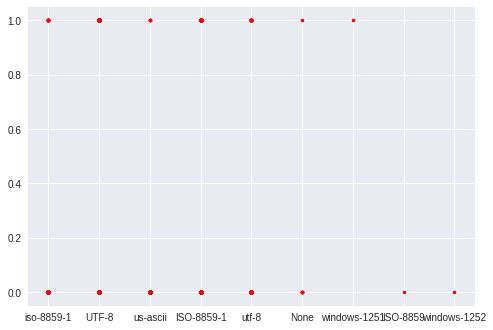

In [145]:
plt.plot(data['CHARSET'],target,'r.')


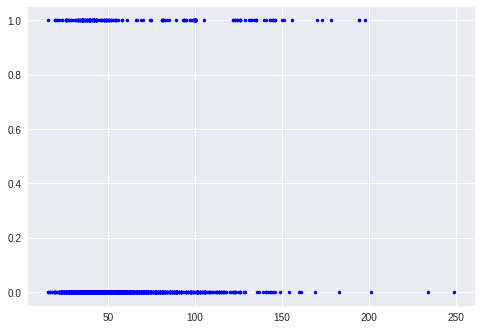

In [146]:

plt.plot(data['URL_LENGTH'],target,'b.')

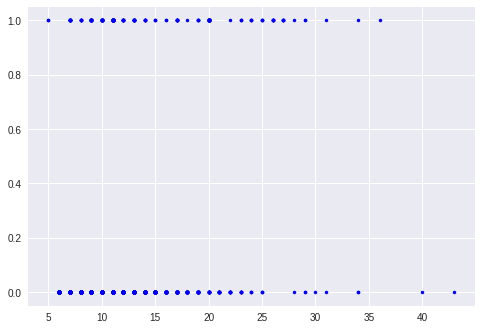

In [147]:
plt.plot(data['NUMBER_SPECIAL_CHARACTERS'],target,'b.')

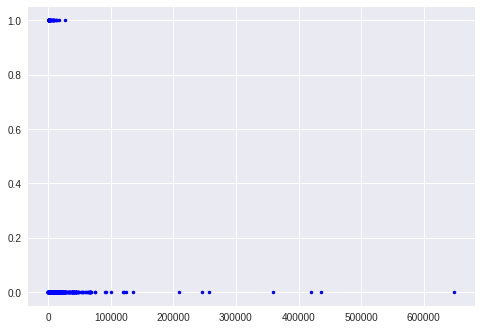

In [148]:
plt.plot(data['CONTENT_LENGTH'],target,'b.')

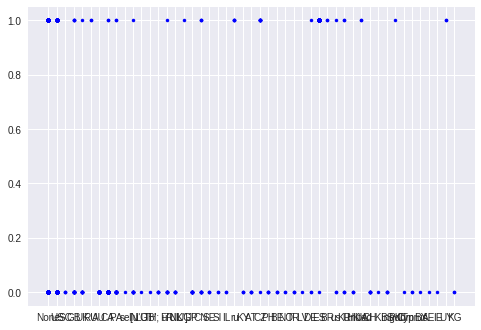

In [149]:
plt.plot(data['WHOIS_COUNTRY'],target,'b.')

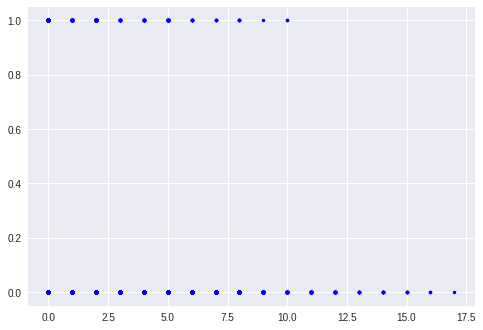

In [150]:
plt.plot(data['REMOTE_IPS'],target,'b.')

**From the above plots we get to know the data is not distributed is exactly classifiable. **

## Therefore from this we, inference we get to know that logistic regresssion is not possible.

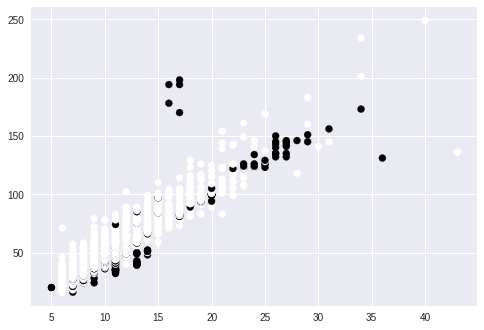

In [151]:
plt.scatter(data['NUMBER_SPECIAL_CHARACTERS'],data['URL_LENGTH'],c = target)

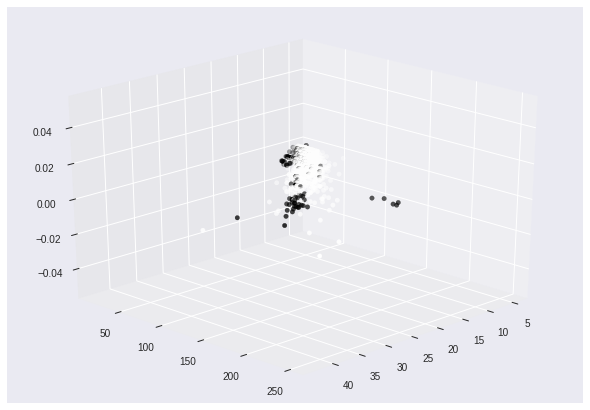

In [152]:
fig = plt.figure()
ax = Axes3D(fig)
ax.view_init(25,45)
ax.scatter(data['NUMBER_SPECIAL_CHARACTERS'],data['URL_LENGTH'],c = target)

**From the above two scatter plot we get to know that the points are overlaping. **

**Hence therefore we cannot use KNN algorithm for classification.**

**Let move on to the data preprocessing and the data cleaning part. **

In [153]:
url_length =len(data['URL'])

for i in range(url_length):
  data['URL'][i] = data['URL'][i][0:2]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


**Slicing all the url string to get the first two characters.**

In [154]:
data.head(10)

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES
0,M0,16,7,iso-8859-1,nginx,263.0,None,None,7,0,2,700,9,10,1153,832,9,2.0
1,B0,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,17,7,4,1230,17,19,1265,1230,17,0.0
2,B0,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,0,0,0,0,0,0,0,0,0,0.0
3,B0,17,6,ISO-8859-1,nginx,162.0,US,AK,31,22,3,3812,39,37,18784,4380,39,8.0
4,B0,17,6,UTF-8,None,124140.0,US,TX,57,2,5,4278,61,62,129889,4586,61,4.0
5,B0,18,7,UTF-8,nginx,NaN,SC,Mahe,11,6,9,894,11,13,838,894,11,0.0
6,B0,18,6,iso-8859-1,Apache/2,345.0,US,CO,12,0,3,1189,14,13,8559,1327,14,2.0
7,B0,19,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,US,FL,0,0,0,0,0,0,0,0,0,0.0
8,M2,20,5,utf-8,nginx/1.10.1,NaN,None,None,0,0,0,0,2,3,213,146,2,2.0
9,M3,20,5,utf-8,nginx/1.10.1,NaN,None,None,0,0,0,0,2,1,62,146,2,2.0


In [155]:
data.isnull().sum()

URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        0
SERVER                         1
CONTENT_LENGTH               812
WHOIS_COUNTRY                  0
WHOIS_STATEPRO                 0
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
dtype: int64

Geting all the sum of missing value count from the above info.

In [0]:
data = data.drop(['CONTENT_LENGTH'],axis=1)

From the missing value info, since there are half of missing values in the CONTENT_LENGTH feature it is wise to drop that.

In [157]:
data.head(10)

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,WHOIS_COUNTRY,WHOIS_STATEPRO,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES
0,M0,16,7,iso-8859-1,nginx,None,None,7,0,2,700,9,10,1153,832,9,2.0
1,B0,16,6,UTF-8,Apache/2.4.10,None,None,17,7,4,1230,17,19,1265,1230,17,0.0
2,B0,16,6,us-ascii,Microsoft-HTTPAPI/2.0,None,None,0,0,0,0,0,0,0,0,0,0.0
3,B0,17,6,ISO-8859-1,nginx,US,AK,31,22,3,3812,39,37,18784,4380,39,8.0
4,B0,17,6,UTF-8,None,US,TX,57,2,5,4278,61,62,129889,4586,61,4.0
5,B0,18,7,UTF-8,nginx,SC,Mahe,11,6,9,894,11,13,838,894,11,0.0
6,B0,18,6,iso-8859-1,Apache/2,US,CO,12,0,3,1189,14,13,8559,1327,14,2.0
7,B0,19,6,us-ascii,Microsoft-HTTPAPI/2.0,US,FL,0,0,0,0,0,0,0,0,0,0.0
8,M2,20,5,utf-8,nginx/1.10.1,None,None,0,0,0,0,2,3,213,146,2,2.0
9,M3,20,5,utf-8,nginx/1.10.1,None,None,0,0,0,0,2,1,62,146,2,2.0


In [0]:
data['CHARSET'] = data['CHARSET'].astype('str')


Converting all the CHARSET to the string type.

In [159]:
url_length = len(data['CHARSET'])
for i in range(url_length):
  data['CHARSET'][i] = data['CHARSET'][i].upper()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Since there are too many lower and upper case of the same string.

We are converting all the string to upper case for catagorization.

In [0]:
d = data['DNS_QUERY_TIMES']
mean_value = d.mean(axis = 0)
data['DNS_QUERY_TIMES'].fillna(value= mean_value ,inplace=True)

Handling the missing value in the DNS_QUERY_TIMES column. filling them with the mean values.

In [161]:
data.head(10)

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,WHOIS_COUNTRY,WHOIS_STATEPRO,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES
0,M0,16,7,ISO-8859-1,nginx,None,None,7,0,2,700,9,10,1153,832,9,2.0
1,B0,16,6,UTF-8,Apache/2.4.10,None,None,17,7,4,1230,17,19,1265,1230,17,0.0
2,B0,16,6,US-ASCII,Microsoft-HTTPAPI/2.0,None,None,0,0,0,0,0,0,0,0,0,0.0
3,B0,17,6,ISO-8859-1,nginx,US,AK,31,22,3,3812,39,37,18784,4380,39,8.0
4,B0,17,6,UTF-8,None,US,TX,57,2,5,4278,61,62,129889,4586,61,4.0
5,B0,18,7,UTF-8,nginx,SC,Mahe,11,6,9,894,11,13,838,894,11,0.0
6,B0,18,6,ISO-8859-1,Apache/2,US,CO,12,0,3,1189,14,13,8559,1327,14,2.0
7,B0,19,6,US-ASCII,Microsoft-HTTPAPI/2.0,US,FL,0,0,0,0,0,0,0,0,0,0.0
8,M2,20,5,UTF-8,nginx/1.10.1,None,None,0,0,0,0,2,3,213,146,2,2.0
9,M3,20,5,UTF-8,nginx/1.10.1,None,None,0,0,0,0,2,1,62,146,2,2.0


In [0]:
le=preprocessing.LabelEncoder()

using the label encoder for the categorization purpose.


In [0]:
data['URL'] = le.fit_transform(data['URL'])


Categorizating of URL using the label encoder.




In [164]:
data.head(10)

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,WHOIS_COUNTRY,WHOIS_STATEPRO,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES
0,1,16,7,ISO-8859-1,nginx,None,None,7,0,2,700,9,10,1153,832,9,2.0
1,0,16,6,UTF-8,Apache/2.4.10,None,None,17,7,4,1230,17,19,1265,1230,17,0.0
2,0,16,6,US-ASCII,Microsoft-HTTPAPI/2.0,None,None,0,0,0,0,0,0,0,0,0,0.0
3,0,17,6,ISO-8859-1,nginx,US,AK,31,22,3,3812,39,37,18784,4380,39,8.0
4,0,17,6,UTF-8,None,US,TX,57,2,5,4278,61,62,129889,4586,61,4.0
5,0,18,7,UTF-8,nginx,SC,Mahe,11,6,9,894,11,13,838,894,11,0.0
6,0,18,6,ISO-8859-1,Apache/2,US,CO,12,0,3,1189,14,13,8559,1327,14,2.0
7,0,19,6,US-ASCII,Microsoft-HTTPAPI/2.0,US,FL,0,0,0,0,0,0,0,0,0,0.0
8,3,20,5,UTF-8,nginx/1.10.1,None,None,0,0,0,0,2,3,213,146,2,2.0
9,4,20,5,UTF-8,nginx/1.10.1,None,None,0,0,0,0,2,1,62,146,2,2.0


In [0]:
data['CHARSET']=le.fit_transform(data['CHARSET'])

Categorizating the CHARSET using the label encoder.

In [166]:
data.head(5)

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,WHOIS_COUNTRY,WHOIS_STATEPRO,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES
0,1,16,7,1,nginx,None,None,7,0,2,700,9,10,1153,832,9,2.0
1,0,16,6,4,Apache/2.4.10,None,None,17,7,4,1230,17,19,1265,1230,17,0.0
2,0,16,6,3,Microsoft-HTTPAPI/2.0,None,None,0,0,0,0,0,0,0,0,0,0.0
3,0,17,6,1,nginx,US,AK,31,22,3,3812,39,37,18784,4380,39,8.0
4,0,17,6,4,None,US,TX,57,2,5,4278,61,62,129889,4586,61,4.0


In [0]:
le.fit(data['WHOIS_COUNTRY'])
data['WHOIS_COUNTRY']=le.transform(data['WHOIS_COUNTRY'])

Categorizating the WHOIS_COUNTRY using the label encoder.

In [168]:
data.head(5)

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,WHOIS_COUNTRY,WHOIS_STATEPRO,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES
0,1,16,7,1,nginx,29,None,7,0,2,700,9,10,1153,832,9,2.0
1,0,16,6,4,Apache/2.4.10,29,None,17,7,4,1230,17,19,1265,1230,17,0.0
2,0,16,6,3,Microsoft-HTTPAPI/2.0,29,None,0,0,0,0,0,0,0,0,0,0.0
3,0,17,6,1,nginx,42,AK,31,22,3,3812,39,37,18784,4380,39,8.0
4,0,17,6,4,None,42,TX,57,2,5,4278,61,62,129889,4586,61,4.0


In [0]:
le.fit(data['WHOIS_STATEPRO'])
data['WHOIS_STATEPRO']=le.transform(data['WHOIS_STATEPRO'])

Categorizating the WHOIS_STATEPRO using the label encoder.

In [170]:
data.head(5)

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,WHOIS_COUNTRY,WHOIS_STATEPRO,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES
0,1,16,7,1,nginx,29,98,7,0,2,700,9,10,1153,832,9,2.0
1,0,16,6,4,Apache/2.4.10,29,98,17,7,4,1230,17,19,1265,1230,17,0.0
2,0,16,6,3,Microsoft-HTTPAPI/2.0,29,98,0,0,0,0,0,0,0,0,0,0.0
3,0,17,6,1,nginx,42,4,31,22,3,3812,39,37,18784,4380,39,8.0
4,0,17,6,4,None,42,137,57,2,5,4278,61,62,129889,4586,61,4.0


In [0]:
data['SERVER'] = data['SERVER'].astype('str')

converting all the values in the SERVER column to the type string.

In [172]:
data.head(5)

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,WHOIS_COUNTRY,WHOIS_STATEPRO,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES
0,1,16,7,1,nginx,29,98,7,0,2,700,9,10,1153,832,9,2.0
1,0,16,6,4,Apache/2.4.10,29,98,17,7,4,1230,17,19,1265,1230,17,0.0
2,0,16,6,3,Microsoft-HTTPAPI/2.0,29,98,0,0,0,0,0,0,0,0,0,0.0
3,0,17,6,1,nginx,42,4,31,22,3,3812,39,37,18784,4380,39,8.0
4,0,17,6,4,None,42,137,57,2,5,4278,61,62,129889,4586,61,4.0


In [0]:
le.fit(data['SERVER'])
data['SERVER']=le.transform(data['SERVER'])

Categorizating SERVER using the label encoder.

In [174]:
type(data['WHOIS_COUNTRY'][1])

numpy.int64

In [0]:
target = target.ravel()


Since after visulization we got to know that the points cannot be classified. 

We thought of choose the SelectKBest function for the purpose of the feature selection.


In [0]:
data_frame_target = pd.concat([data,data_set['Type']],axis=1)

Concatinating the target wth the data.

In [0]:
bestfeatures = SelectKBest(score_func=chi2, k=17)

In [0]:
fit = bestfeatures.fit(data_frame_target,y)

In [0]:
dfscores = pd.DataFrame(fit.scores_)

In [0]:
dfcolumns = pd.DataFrame(data_frame_target.columns)

In [0]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)

In [0]:
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [183]:
print(featureScores.nlargest(17,'Score'))

                        Specs         Score
10                  APP_BYTES  1.631711e+06
14           REMOTE_APP_BYTES  1.542585e+06
13           SOURCE_APP_BYTES  8.250551e+05
4                      SERVER  4.290860e+03
6              WHOIS_STATEPRO  1.704983e+03
3                     CHARSET  1.123503e+03
1                  URL_LENGTH  7.753991e+02
8        DIST_REMOTE_TCP_PORT  5.318843e+02
11         SOURCE_APP_PACKETS  4.387051e+02
15                APP_PACKETS  4.387051e+02
12         REMOTE_APP_PACKETS  4.255674e+02
7   TCP_CONVERSATION_EXCHANGE  3.952776e+02
0                         URL  2.951547e+02
2   NUMBER_SPECIAL_CHARACTERS  1.617997e+02
5               WHOIS_COUNTRY  9.139860e+01
17                       Type  6.500406e+01
16            DNS_QUERY_TIMES  5.132420e+01


## From the above we get to know that only few features are the best according to this function.

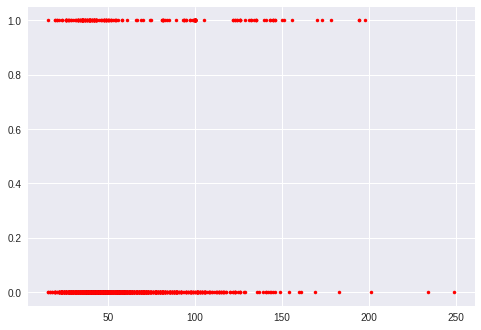

In [184]:
plt.plot(data['URL_LENGTH'],data_set['Type'],'r.')

Visualization the data after the cleanning and preprocessing part.

## Now we are using the ExtraTreesClassifier for more info about the features.

In [0]:
model = ExtraTreesClassifier()

In [186]:
model.fit(data_frame_target,target)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [187]:
print(model.feature_importances_)

[2.61916746e-01 3.93149602e-03 5.03601360e-03 4.29723963e-03
 1.03037621e-02 1.01315346e-02 9.04285109e-03 3.51240484e-04
 1.30650381e-06 3.22675301e-03 2.95674280e-03 6.52681713e-03
 4.40371058e-04 5.54958678e-04 1.06878778e-04 1.55164890e-05
 3.34208393e-03 6.77817688e-01]


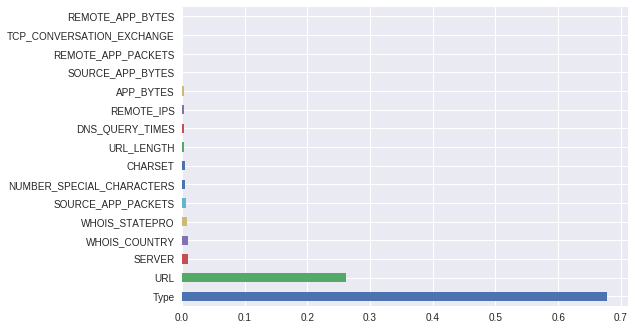

In [188]:
feat_importances = pd.Series(model.feature_importances_, index=data_frame_target.columns)
feat_importances.nlargest(16).plot(kind='barh')
plt.show()

### So from above we get to know the features that we have to select.

## Now taking the correlation between the features for further info about the features.

In [0]:
corrmat = data_frame_target.corr('pearson')

In [0]:
top_corr_features = corrmat.index

In [191]:
corrmat

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,WHOIS_COUNTRY,WHOIS_STATEPRO,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
URL,1.000000,0.405853,0.464875,0.143533,-0.192947,-0.303051,-0.177465,-0.078816,-0.067453,-0.165114,-0.012410,-0.084144,-0.067991,-0.051445,-0.012833,-0.084144,-0.104480,0.767996
URL_LENGTH,0.405853,1.000000,0.917986,0.130988,-0.143270,-0.108296,-0.098842,-0.038407,-0.039839,-0.046367,-0.026446,-0.042264,-0.033779,-0.014857,-0.026686,-0.042264,-0.068533,0.162104
NUMBER_SPECIAL_CHARACTERS,0.464875,0.917986,1.000000,0.152771,-0.114595,-0.126128,-0.091774,-0.037459,-0.042619,-0.047103,-0.023914,-0.040096,-0.030597,-0.014376,-0.024098,-0.040096,-0.050038,0.280897
CHARSET,0.143533,0.130988,0.152771,1.000000,0.119048,-0.005197,-0.117712,0.002413,0.039565,0.018734,0.016993,0.001569,0.008502,0.008254,0.016943,0.001569,-0.008384,0.057566
SERVER,-0.192947,-0.143270,-0.114595,0.119048,1.000000,0.183576,0.017423,-0.012844,0.022226,0.039651,-0.020819,-0.007204,-0.018282,-0.026644,-0.020538,-0.007204,0.075268,-0.081720
WHOIS_COUNTRY,-0.303051,-0.108296,-0.126128,-0.005197,0.183576,1.000000,-0.219745,0.000032,0.024326,0.030862,-0.050343,0.004816,-0.006054,0.002803,-0.050086,0.004816,0.065571,-0.248438
WHOIS_STATEPRO,-0.177465,-0.098842,-0.091774,-0.117712,0.017423,-0.219745,1.000000,-0.011156,-0.061292,0.075052,-0.035522,-0.008734,-0.007998,0.007989,-0.035382,-0.008734,0.033461,0.010345
TCP_CONVERSATION_EXCHANGE,-0.078816,-0.038407,-0.037459,0.002413,-0.012844,0.000032,-0.011156,1.000000,0.555188,0.331080,0.457320,0.997796,0.990848,0.865580,0.458702,0.997796,0.349823,-0.040202
DIST_REMOTE_TCP_PORT,-0.067453,-0.039839,-0.042619,0.039565,0.022226,0.024326,-0.061292,0.555188,1.000000,0.210188,0.780238,0.558612,0.591188,0.313359,0.781212,0.558612,0.259941,-0.082925
REMOTE_IPS,-0.165114,-0.046367,-0.047103,0.018734,0.039651,0.030862,0.075052,0.331080,0.210188,1.000000,0.023126,0.361104,0.304683,0.171651,0.025324,0.361104,0.548174,-0.078783


In [192]:
abs(corrmat['Type']).sort_values()

WHOIS_STATEPRO               0.010345
REMOTE_APP_BYTES             0.011004
APP_BYTES                    0.011262
REMOTE_APP_PACKETS           0.032897
SOURCE_APP_PACKETS           0.034414
APP_PACKETS                  0.034414
TCP_CONVERSATION_EXCHANGE    0.040202
SOURCE_APP_BYTES             0.043852
CHARSET                      0.057566
DNS_QUERY_TIMES              0.068751
REMOTE_IPS                   0.078783
SERVER                       0.081720
DIST_REMOTE_TCP_PORT         0.082925
URL_LENGTH                   0.162104
WHOIS_COUNTRY                0.248438
NUMBER_SPECIAL_CHARACTERS    0.280897
URL                          0.767996
Type                         1.000000
Name: Type, dtype: float64

#### From above we get to know that, there are few feature which are not at all affecting the target.

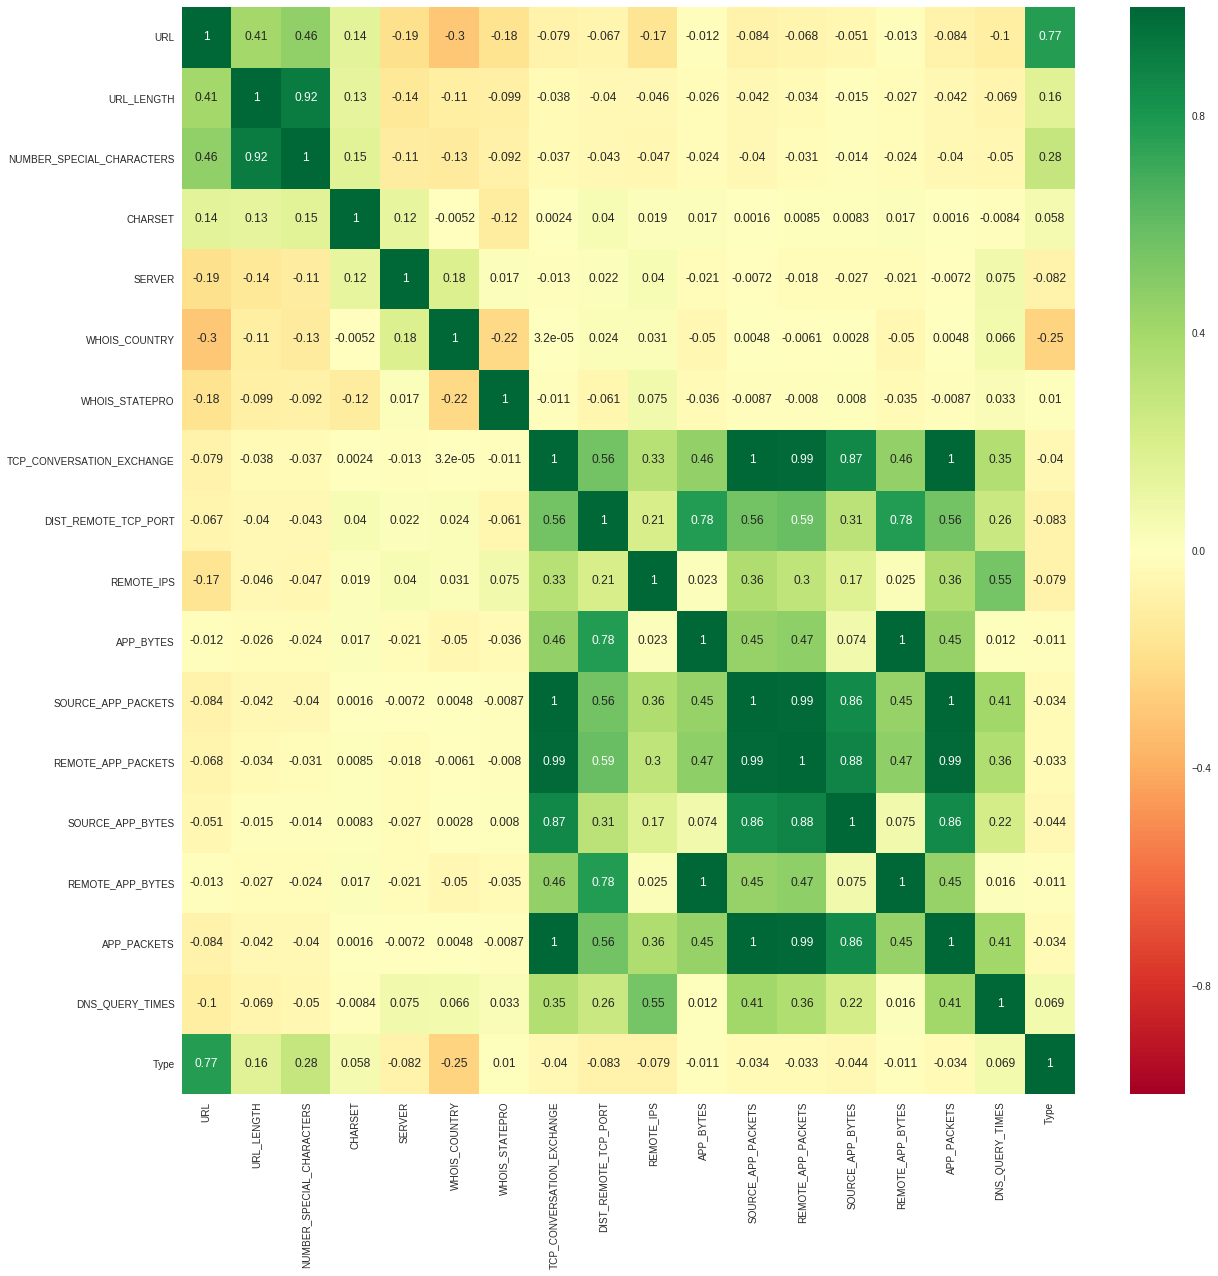

In [193]:
plt.figure(figsize=(20,20))
g=sns.heatmap(data_frame_target[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Considering the heat map above we can infer that there are few features not impacting the target much.

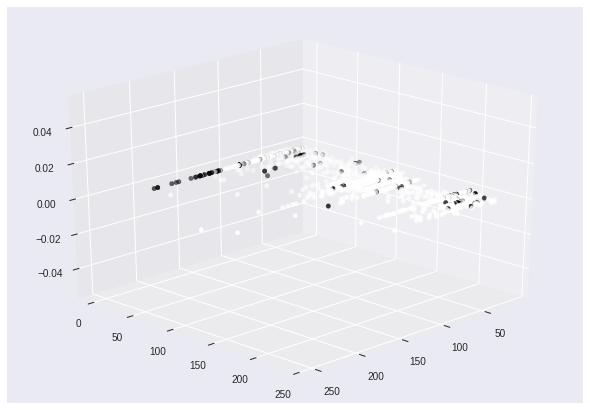

In [194]:
fig = plt.figure()
ax = Axes3D(fig)
ax.view_init(25,45)
ax.scatter(data['URL_LENGTH'],data['SERVER'],c=target )


#### By considering the above 3D PLOT we get to know that even after the data cleaning process. The points are still overlaping with each other.

## So from all the above points we can consider few features and proceed to train the model using neural networks

In [0]:
dataframe = data.drop(['WHOIS_STATEPRO','APP_BYTES','SOURCE_APP_BYTES','REMOTE_APP_BYTES'],axis=1)

Above function drops the list of features specified. 

In [0]:
final_data = np.array(dataframe)
target = np.array(target)

Converting the data and the target into the numpy array.

In [0]:
xtrain, xtest, ytrain, ytest = train_test_split(final_data, target, test_size = 0.2)

Spliting the data into train and the test using the train_test_split function.

In [0]:
model = Sequential([
    Dense(32, activation='sigmoid', input_shape=(xtrain[1].shape)),
    Dense(60, activation='sigmoid'),
    Dense(2, activation = 'softmax')
]) 

Here we use the Sequential method for creating the neural networks.  

And Dense to define the number of nodes and the activation function for the layer.

In [205]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 32)                448       
_________________________________________________________________
dense_8 (Dense)              (None, 60)                1980      
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 122       
Total params: 2,550
Trainable params: 2,550
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer = 'Adam',
             metrics = ['accuracy'])

Using Adam optimizer for the optimization.

In [207]:
history = model.fit(xtrain, ytrain, epochs=30, verbose = 1)

Epoch 1/30
1424/1424 [==============================] - 0s 181us/step - loss: 0.3777 - acc: 0.8778
Epoch 2/30
1424/1424 [==============================] - 0s 35us/step - loss: 0.3480 - acc: 0.8778
Epoch 3/30
1424/1424 [==============================] - 0s 35us/step - loss: 0.3284 - acc: 0.8778
Epoch 4/30
1424/1424 [==============================] - 0s 33us/step - loss: 0.3084 - acc: 0.8792
Epoch 5/30
1424/1424 [==============================] - 0s 36us/step - loss: 0.2878 - acc: 0.9122
Epoch 6/30
1424/1424 [==============================] - 0s 35us/step - loss: 0.2688 - acc: 0.9129
Epoch 7/30
1424/1424 [==============================] - 0s 35us/step - loss: 0.2523 - acc: 0.9129
Epoch 8/30
1424/1424 [==============================] - 0s 35us/step - loss: 0.2322 - acc: 0.9129
Epoch 9/30
1424/1424 [==============================] - 0s 35us/step - loss: 0.2123 - acc: 0.9164
Epoch 10/30
1424/1424 [==============================] - 0s 35us/step - loss: 0.2014 - acc: 0.9284
Epoch 11/30
1424/1

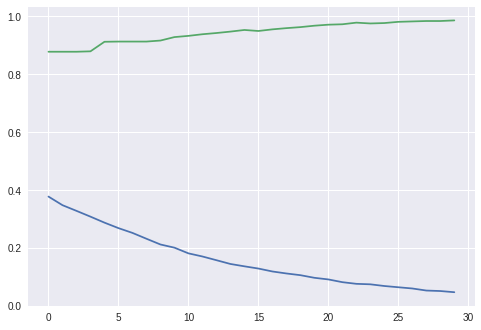

In [208]:
plt.plot(history.epoch, history.history['loss'],
        history.epoch, history.history['acc'])

# Hence from the analisys, we trained the model using keras.

## Got accuracy of 98.60% 